# 3. Multi-class Vnet on BV

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dataset import *
from vnet import *
from training import *
from niiutility import show_image, show_batch_image

%matplotlib inline
%load_ext autoreload
%autoreload 2

## 3.1 Setup Torch Global Variable, load memory map 

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader, sampler
from torchvision import transforms, utils

import torch.nn.functional as F  # useful stateless functions
import torchvision.transforms as T


USE_GPU = False
BATCH_SIZE = 4

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [3]:
data_index = np.arange(107)
data_index = np.delete(data_index, 46)
dataset_trans = niiDataset(data_index, 
                         transform=transforms.Compose([
                             downSample(2),
                             RandomFilp(0.5),
                             RandomAffine(30, 15)
                         ])
                     )

* Print first 4 batch of data

In [4]:
dataloader = DataLoader(dataset_trans, batch_size=BATCH_SIZE, \
                        shuffle=True, num_workers=4)

0 torch.Size([4, 1, 96, 128, 128]) torch.Size([4, 3, 96, 128, 128])
1 torch.Size([4, 1, 96, 128, 128]) torch.Size([4, 3, 96, 128, 128])
2 torch.Size([4, 1, 96, 128, 128]) torch.Size([4, 3, 96, 128, 128])
3 torch.Size([4, 1, 96, 128, 128]) torch.Size([4, 3, 96, 128, 128])


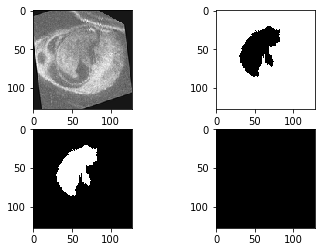

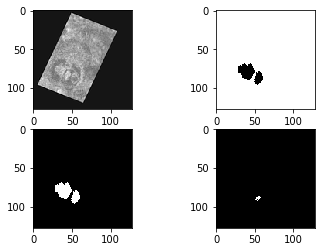

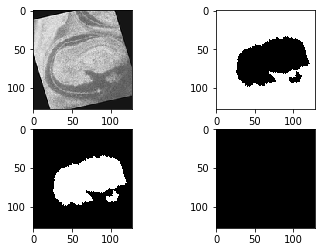

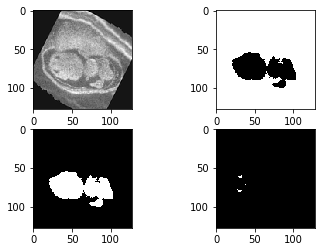

In [5]:
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(), \
          sample_batched['label'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        show_batch_image(sample_batched['image'],sample_batched['label'],BATCH_SIZE)
        break